In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = r"C:\Users\samvi\OneDrive\Desktop\Semester\IML\Sameer_Rangwala_A1\decision_tree_task\data\fraud_train.csv"
df = pd.read_csv(path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,619,CASH_IN,386385.08,C421351828,4669568.85,5055953.92,C1977099364,506035.06,119649.98,0,0
1,164,CASH_IN,212458.78,C83569848,234635.00,447093.78,C1690589535,806037.88,593579.10,0,0
2,382,PAYMENT,19967.60,C852995095,3634.00,0.00,M1695416333,0.00,0.00,0,0
3,180,CASH_OUT,527616.51,C61761046,180216.00,0.00,C577654587,92157.10,619773.61,0,0
4,36,TRANSFER,206067.85,C758004147,0.00,0.00,C2143015292,2131494.48,2337562.32,0,0


In [9]:
# Finding the distribution of fraud in the entire dataset
fraud_distribution = df['isFraud'].value_counts(normalize=False)
fraud_distribution.head()

isFraud
0    5083503
1       6593
Name: count, dtype: int64

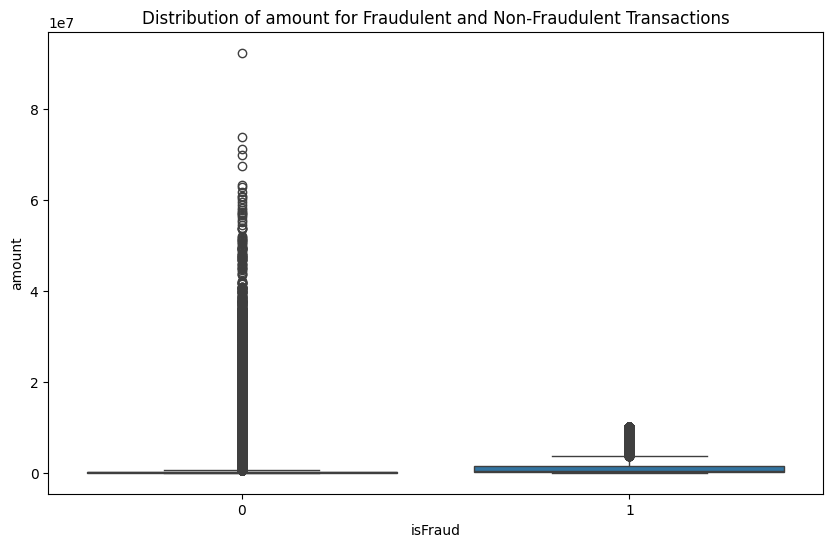

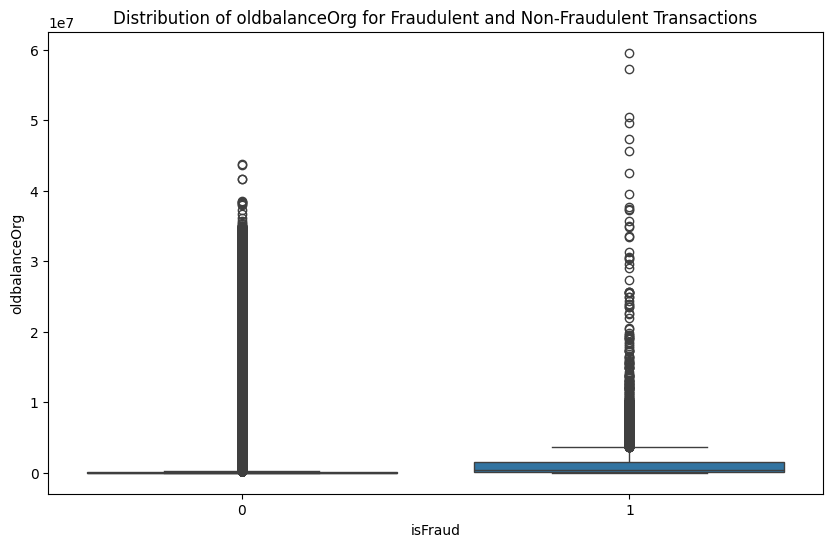

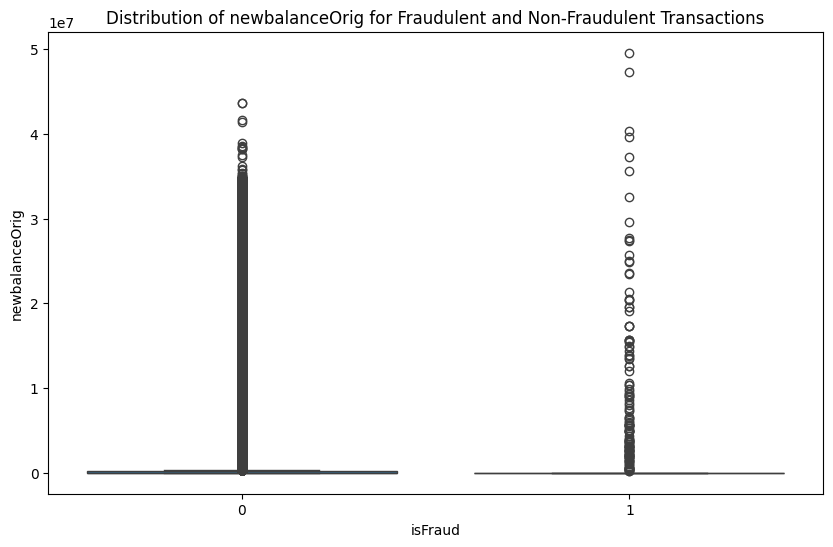

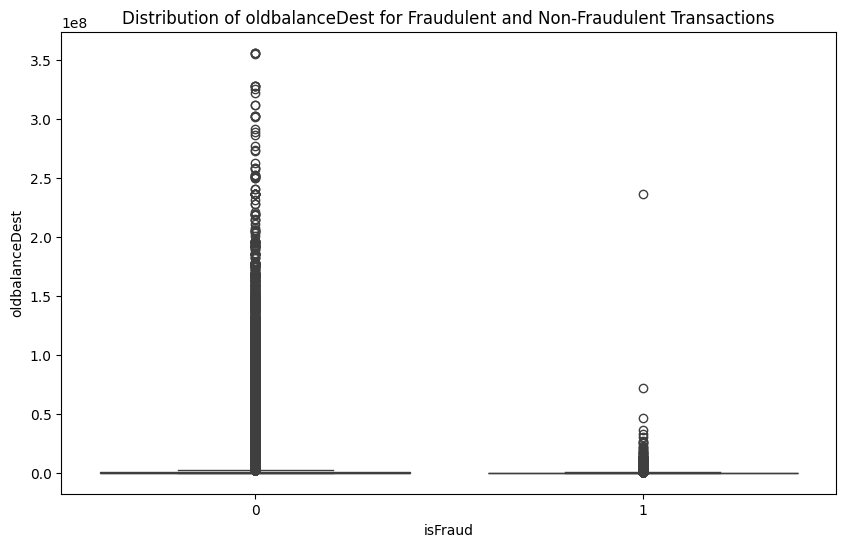

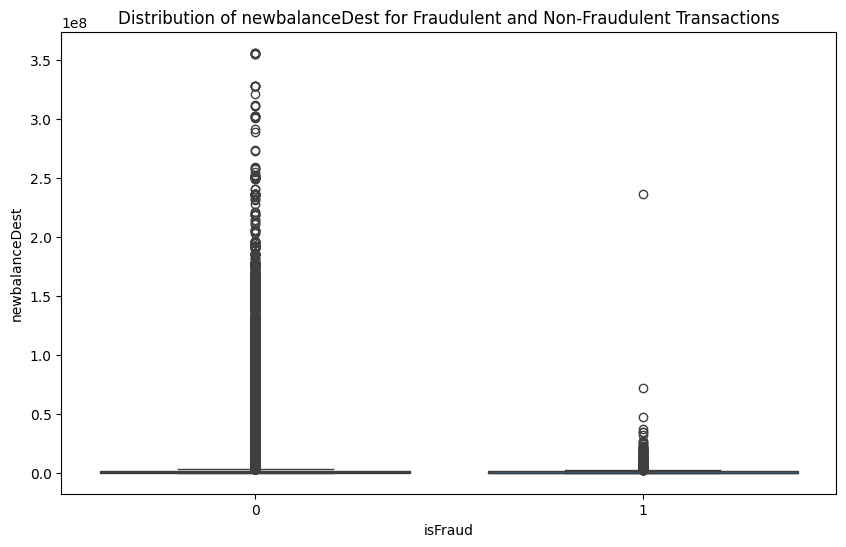

In [11]:
# Numerical features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='isFraud', y=feature, data=df)
    plt.title(f'Distribution of {feature} for Fraudulent and Non-Fraudulent Transactions')
    plt.show()

type
CASH_IN     0.000000
CASH_OUT    0.001846
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007710
Name: isFraud, dtype: float64

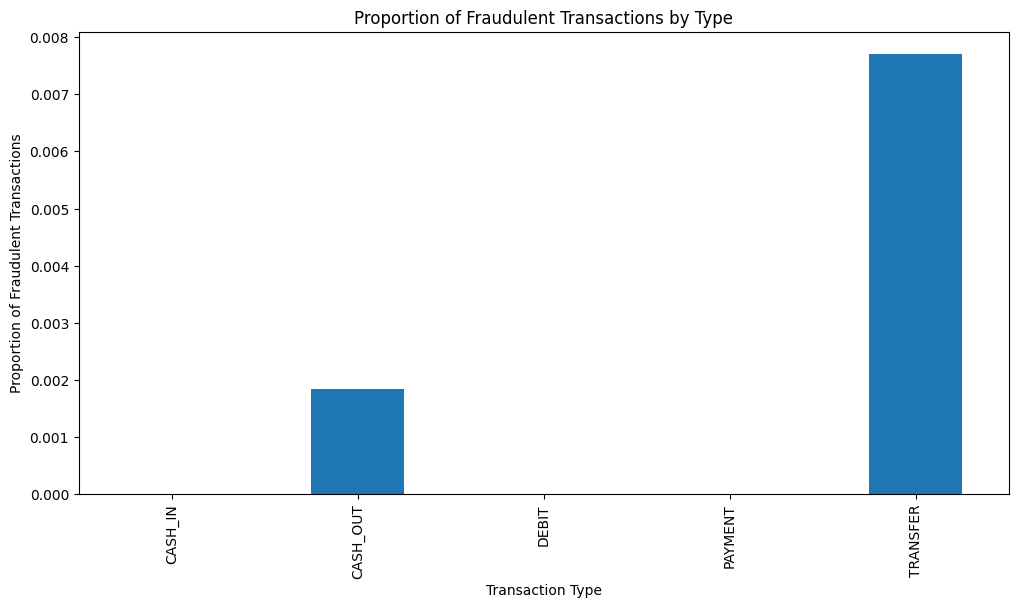

In [15]:
# Fraud distribution by type of transaction
plt.figure(figsize=(12, 6))
fraud_by_type = df.groupby('type')['isFraud'].mean()
fraud_by_type.plot(kind='bar')
plt.title('Proportion of Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.plot()

fraud_by_type

[]

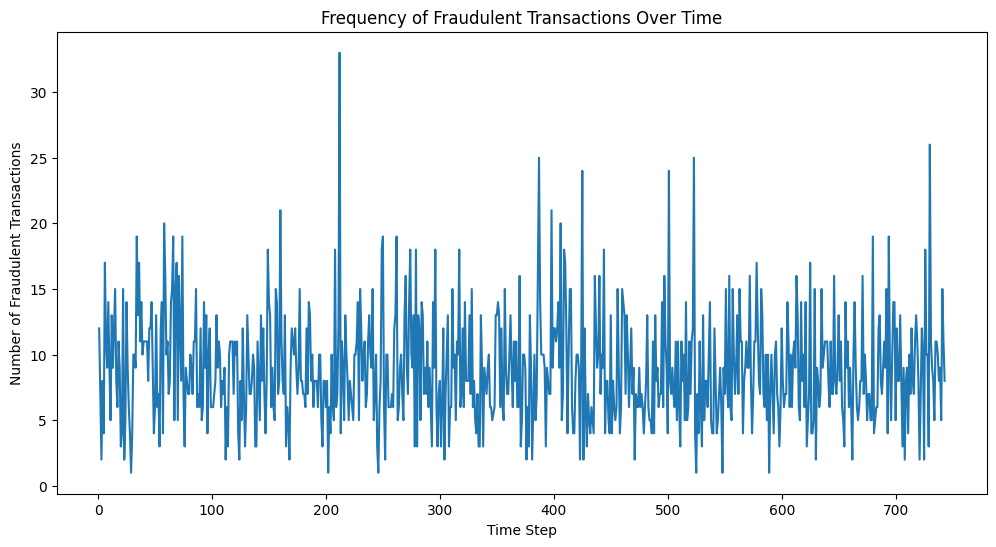

In [13]:
# Analysis based on step
plt.figure(figsize=(12, 6))
fraud_over_time = df[df['isFraud'] == 1].groupby('step').size()
plt.plot(fraud_over_time.index, fraud_over_time.values)
plt.title('Frequency of Fraudulent Transactions Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.plot()

[]

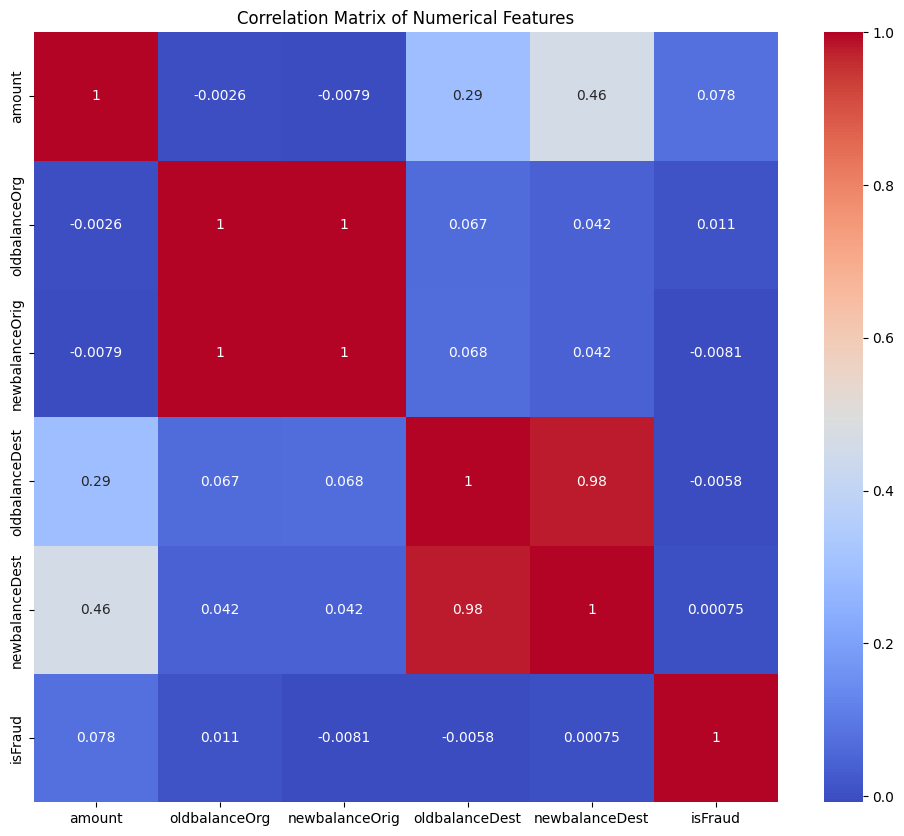

In [14]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + ['isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.plot()

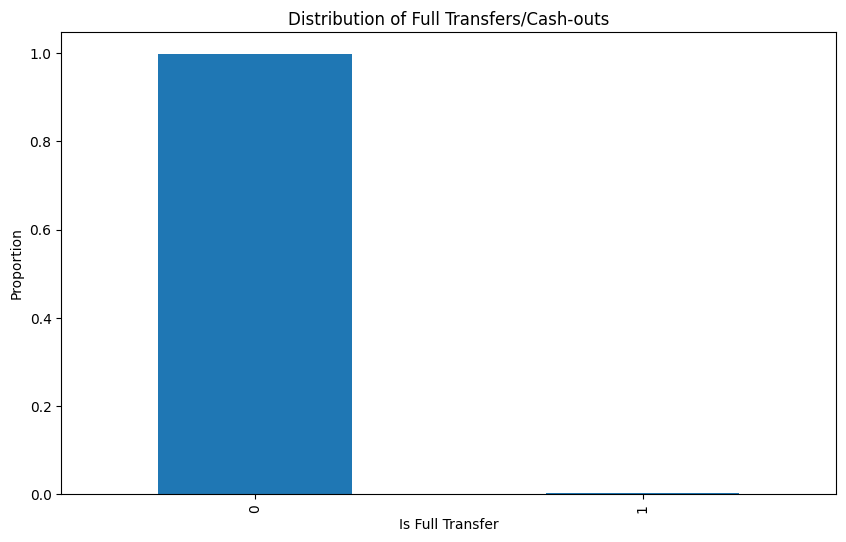

In [16]:
# Seeing if the entire account balance is the amount for transfer
df['is_full_transfer'] = (df['amount'] == df['oldbalanceOrg']).astype(int)

# Distribution of full transfers
plt.figure(figsize=(10, 6))
df['is_full_transfer'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Full Transfers/Cash-outs')
plt.xlabel('Is Full Transfer')
plt.ylabel('Proportion')
plt.show()

In [25]:
# Fraud rate for full transfers vs partial transfers
fraud_rate_full = df[df['is_full_transfer'] == 1]['isFraud'].mean()
fraud_rate_partial = df[df['is_full_transfer'] == 0]['isFraud'].mean()

print("Full transfer fraud rate: ",fraud_rate_full)
print("Partial transfer fraud rate: ",fraud_rate_partial)

Full transfer fraud rate:  1.0
Partial transfer fraud rate:  2.9309638031871575e-05


In [23]:
# Fraud distribution among full transfers
fraud_dist_full = df[df['is_full_transfer'] == 1]['isFraud'].value_counts(normalize=False)
fraud_dist_partial = df[df['is_full_transfer'] == 0]['isFraud'].value_counts(normalize=False)

print(fraud_dist_full)
print(fraud_dist_partial)


isFraud
1    6444
Name: count, dtype: int64
isFraud
0    5083503
1        149
Name: count, dtype: int64
